<a href="https://colab.research.google.com/github/mamatqobulovsardor/Aviakompaniya_yo-lovchilarining_qoniqishi/blob/main/Aviakompaniya_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

In [ ]:
train_dataset = pd.read_csv("/content/train_dataset.csv")
test_dataset = pd.read_csv("/content/test_dataset.csv")
sample_submission = pd.read_csv("/content/sample_submission.csv")

In [ ]:
train_dataset.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [ ]:
train_dataset.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,5000.50000,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,2886.89568,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,1.00000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,5000.50000,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,7500.25000,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,10000.00000,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [ ]:
train_dataset.isna().sum()

,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0


In [ ]:
train_dataset['satisfaction'].value_counts()/len(train_dataset)*100

,count
satisfaction,
0,50.0
1,50.0


In [ ]:
train_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

train_dataset[train_columns] = train_dataset[train_columns].replace({"Male":1, "Female":0,
                                                                     "Loyal Customer":1, "disloyal Customer":0,
                                                                     "Personal Travel":1, "Business travel":0,
                                                                     "Eco":0, "Eco Plus":1, "Business":2})

<ipython-input-8-ed37dd683286>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_dataset[train_columns] = train_dataset[train_columns].replace({"Male":1, "Female":0,


In [ ]:
train_dataset['Arrival Delay in Minutes'].fillna(train_dataset['Arrival Delay in Minutes'].mean(), inplace=True)

<ipython-input-9-0a0d808aecf2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_dataset['Arrival Delay in Minutes'].fillna(train_dataset['Arrival Delay in Minutes'].mean(), inplace=True)


In [ ]:
X = train_dataset.drop(["satisfaction", "id"], axis=1)
Y = train_dataset['satisfaction']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1000
           1       0.96      0.94      0.95      1000

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Model anoqligi: 0.952


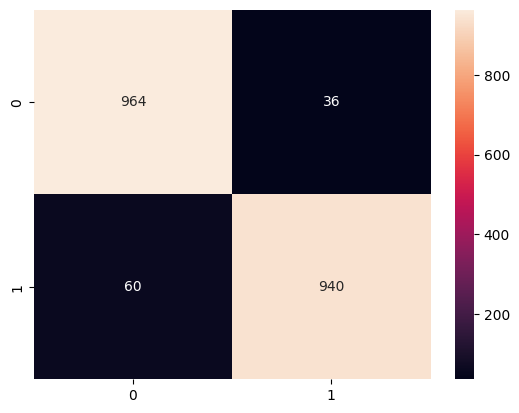

<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
XGB_model = XGBClassifier()
XGB_model.fit(X_train, Y_train)

Y_pred = XGB_model.predict(X_test)
print(metrics.classification_report(Y_test, Y_pred))
print("Model anoqligi:", metrics.accuracy_score(Y_test, Y_pred))

conf_mat=metrics.confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
plt.show

Test_set

In [ ]:
test_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

test_dataset[train_columns] = train_dataset[train_columns].replace({"Male":1, "Female":0,
                                                                     "Loyal Customer":1, "disloyal Customer":0,
                                                                     "Personal Travel":1, "Business travel":0,
                                                                     "Eco":0, "Eco Plus":1, "Business":2})

In [ ]:
#test_dataset['Arrival Delay in Minutes'] = test_dataset['Arrival Delay in Minutes'].fillna(0)      # bu kodini ishlatgan maqulmi yoki pastagisinimi

In [ ]:
test_dataset['Arrival Delay in Minutes'].fillna(test_dataset['Arrival Delay in Minutes'].mean(), inplace=True)

<ipython-input-16-567599701340>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_dataset['Arrival Delay in Minutes'].fillna(test_dataset['Arrival Delay in Minutes'].mean(), inplace=True)


In [ ]:
X1_test = test_dataset.copy()

In [ ]:
X1_test = X1_test.drop("id", axis=1)

In [ ]:
X1_test = scaler.transform(X1_test)

In [ ]:
Y_test_pred = XGB_model.predict(X1_test)

In [ ]:
Y_test_pred = pd.DataFrame(Y_test_pred)

bahorat qilinishi kerak bulgan qiymanting javobu manashi

In [ ]:
Y_test_pred

,0
0,1
1,1
2,1
3,1
4,1
...,...
3995,1
3996,1
3997,1
3998,0


In [ ]:
sample_submission['satisfaction'] = Y_test_pred[0].copy

In [ ]:
sample_submission.to_csv('Aviakompaniya_j.csv', index=False)